## Boilerplate

In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

import json
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import torch

from pytorch_lightning.loggers.csv_logs import CSVLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint

In [3]:
def read_json(path):
    with open(path, 'r') as infile:
        dat = json.load(infile)
    return dat

def save_json(d, path, indent=4, sort_keys=True):
    """Saves a json file to the path specified.

    Parameters
    ----------
    d : dict
        Must be serializable.
    path : str
        File path to save at.
    """

    with open(path, 'w') as outfile:
        json.dump(d, outfile, indent=indent, sort_keys=sort_keys)

In [4]:
class NullClass:
    def do_nothing(*args, **kwargs):
        pass
    def add_colorbar(self, im, **kwargs):
        return plt.colorbar(im)
    def __getattr__(self, _):
        return self.do_nothing
try:
    from mpl_utils import MPLAdjutant
    adj = MPLAdjutant()
    adj.set_defaults()
except ImportError:
    adj = NullClass()

# Loading in Data

In [5]:
from gale.data import Data
from gale.models import Model, Trainer

In [6]:
data = pickle.load(open("/Users/aghose/Desktop/BNL2022/Data/22_QM9_forward/XANES-220531-data-O-ACSF-small.pkl", "rb"))

In [7]:
np.random.seed(1234)
torch.manual_seed(1234)
x_train, x_val, y_train, y_val = train_test_split(
    data["x"], data["y"], test_size=0.1, random_state=42
)

In [8]:
loader = Data(x_train, y_train, x_val, y_val)

## Setting up Random Model Architecture

In [9]:
logger = CSVLogger("debug/test_logs", name="001")
checkpointer = ModelCheckpoint(dirpath="debug/test/model05_4444", save_top_k=5, monitor="val_loss")
early_stopper = EarlyStopping(
    monitor="val_loss",
    check_finite=True,
    patience=50,
    verbose=False,
)

In [10]:
model = Model(input_size=x_train.shape[1], output_size=y_train.shape[1])
model = model.from_random_architecture(random_seed=4444, input_size=x_train.shape[1], output_size=y_train.shape[1])
model._print_every_epoch = 1

## Training

In [11]:
trainer = Trainer(
    gpus=0,
    num_nodes=1,
    auto_select_gpus=False,
    precision=32,
    max_epochs=200,
    enable_progress_bar=True,
    log_every_n_steps=1,
    logger=logger,
    callbacks=[checkpointer, early_stopper],
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [12]:
trainer.fit(model, loader)


  | Name       | Type    | Params
---------------------------------------
0 | _criterion | MSELoss | 0     
1 | _net       | Net     | 66.2 K
---------------------------------------
66.2 K    Trainable params
0         Non-trainable params
66.2 K    Total params
0.265     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch 00001
	lr: 1.000e-02
	cv loss: 6.954e-01


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 00001
	lr: 1.000e-02
	cv loss: 4.514e-02
	tr loss: 7.678e-02 | (1.94 s | 0.03 m)


Validation: 0it [00:00, ?it/s]

Epoch 00002
	lr: 1.000e-02
	cv loss: 3.704e-02
	tr loss: 4.100e-02 | (1.30 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00003
	lr: 1.000e-02
	cv loss: 3.513e-02
	tr loss: 3.653e-02 | (1.30 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00004
	lr: 1.000e-02
	cv loss: 4.085e-02
	tr loss: 3.358e-02 | (1.33 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00005
	lr: 1.000e-02
	cv loss: 3.839e-02
	tr loss: 3.344e-02 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00006
	lr: 1.000e-02
	cv loss: 3.551e-02
	tr loss: 3.307e-02 | (1.30 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00007
	lr: 1.000e-02
	cv loss: 3.241e-02
	tr loss: 3.087e-02 | (1.35 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00008
	lr: 1.000e-02
	cv loss: 5.046e-02
	tr loss: 3.017e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00009
	lr: 1.000e-02
	cv loss: 3.706e-02
	tr loss: 3.046e-02 | (1.29 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00010
	lr: 1.000e-02
	cv loss: 3.061e-02
	tr loss: 2.799e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00011
	lr: 1.000e-02
	cv loss: 3.296e-02
	tr loss: 2.852e-02 | (1.30 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00012
	lr: 1.000e-02
	cv loss: 3.169e-02
	tr loss: 2.722e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00013
	lr: 1.000e-02
	cv loss: 2.903e-02
	tr loss: 2.628e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00014
	lr: 1.000e-02
	cv loss: 2.815e-02
	tr loss: 2.560e-02 | (1.30 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00015
	lr: 1.000e-02
	cv loss: 2.624e-02
	tr loss: 2.540e-02 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00016
	lr: 1.000e-02
	cv loss: 2.562e-02
	tr loss: 2.584e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00017
	lr: 1.000e-02
	cv loss: 3.180e-02
	tr loss: 2.540e-02 | (1.30 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00018
	lr: 1.000e-02
	cv loss: 2.750e-02
	tr loss: 2.513e-02 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00019
	lr: 1.000e-02
	cv loss: 2.501e-02
	tr loss: 2.632e-02 | (1.35 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00020
	lr: 1.000e-02
	cv loss: 2.565e-02
	tr loss: 2.460e-02 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00021
	lr: 1.000e-02
	cv loss: 2.715e-02
	tr loss: 2.385e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00022
	lr: 1.000e-02
	cv loss: 2.632e-02
	tr loss: 2.369e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00023
	lr: 1.000e-02
	cv loss: 2.778e-02
	tr loss: 2.317e-02 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00024
	lr: 1.000e-02
	cv loss: 2.619e-02
	tr loss: 2.307e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00025
	lr: 1.000e-02
	cv loss: 2.427e-02
	tr loss: 2.292e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00026
	lr: 1.000e-02
	cv loss: 2.628e-02
	tr loss: 2.265e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00027
	lr: 1.000e-02
	cv loss: 2.438e-02
	tr loss: 2.268e-02 | (1.35 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00028
	lr: 1.000e-02
	cv loss: 2.635e-02
	tr loss: 2.224e-02 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00029
	lr: 1.000e-02
	cv loss: 2.945e-02
	tr loss: 2.190e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00030
	lr: 1.000e-02
	cv loss: 2.505e-02
	tr loss: 2.195e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00031
	lr: 1.000e-02
	cv loss: 2.920e-02
	tr loss: 2.211e-02 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00032
	lr: 1.000e-02
	cv loss: 2.456e-02
	tr loss: 2.206e-02 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00033
	lr: 1.000e-02
	cv loss: 2.583e-02
	tr loss: 2.154e-02 | (1.30 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00034
	lr: 1.000e-02
	cv loss: 2.637e-02
	tr loss: 2.134e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00035
	lr: 1.000e-02
	cv loss: 2.683e-02
	tr loss: 2.125e-02 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00036
	lr: 1.000e-02
	cv loss: 2.547e-02
	tr loss: 2.098e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00037
	lr: 1.000e-02
	cv loss: 2.356e-02
	tr loss: 2.090e-02 | (1.35 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00038
	lr: 1.000e-02
	cv loss: 2.286e-02
	tr loss: 2.101e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00039
	lr: 1.000e-02
	cv loss: 2.341e-02
	tr loss: 2.091e-02 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00040
	lr: 1.000e-02
	cv loss: 2.467e-02
	tr loss: 2.113e-02 | (1.35 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00041
	lr: 1.000e-02
	cv loss: 2.351e-02
	tr loss: 2.069e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00042
	lr: 1.000e-02
	cv loss: 2.260e-02
	tr loss: 2.059e-02 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00043
	lr: 1.000e-02
	cv loss: 2.648e-02
	tr loss: 2.043e-02 | (1.33 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00044
	lr: 1.000e-02
	cv loss: 2.582e-02
	tr loss: 2.037e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00045
	lr: 1.000e-02
	cv loss: 2.655e-02
	tr loss: 1.994e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00046
	lr: 1.000e-02
	cv loss: 2.343e-02
	tr loss: 2.086e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00047
	lr: 1.000e-02
	cv loss: 2.253e-02
	tr loss: 1.978e-02 | (1.35 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00048
	lr: 1.000e-02
	cv loss: 2.365e-02
	tr loss: 1.944e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00049
	lr: 1.000e-02
	cv loss: 2.811e-02
	tr loss: 2.079e-02 | (1.33 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00050
	lr: 1.000e-02
	cv loss: 2.248e-02
	tr loss: 2.007e-02 | (1.35 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00051
	lr: 1.000e-02
	cv loss: 2.137e-02
	tr loss: 1.959e-02 | (1.35 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00052
	lr: 1.000e-02
	cv loss: 2.331e-02
	tr loss: 1.908e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00053
	lr: 1.000e-02
	cv loss: 2.281e-02
	tr loss: 1.965e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00054
	lr: 1.000e-02
	cv loss: 2.218e-02
	tr loss: 1.973e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00055
	lr: 1.000e-02
	cv loss: 2.218e-02
	tr loss: 1.918e-02 | (1.38 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00056
	lr: 1.000e-02
	cv loss: 2.243e-02
	tr loss: 1.873e-02 | (1.43 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00057
	lr: 1.000e-02
	cv loss: 2.154e-02
	tr loss: 2.015e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00058
	lr: 1.000e-02
	cv loss: 2.107e-02
	tr loss: 1.891e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00059
	lr: 1.000e-02
	cv loss: 2.357e-02
	tr loss: 1.842e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00060
	lr: 1.000e-02
	cv loss: 2.299e-02
	tr loss: 1.841e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00061
	lr: 1.000e-02
	cv loss: 2.206e-02
	tr loss: 1.808e-02 | (1.38 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00062
	lr: 1.000e-02
	cv loss: 2.334e-02
	tr loss: 1.811e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00063
	lr: 1.000e-02
	cv loss: 2.263e-02
	tr loss: 1.808e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00064
	lr: 1.000e-02
	cv loss: 2.284e-02
	tr loss: 1.830e-02 | (1.38 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00065
	lr: 1.000e-02
	cv loss: 2.386e-02
	tr loss: 1.863e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00066
	lr: 1.000e-02
	cv loss: 2.219e-02
	tr loss: 1.845e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00067
	lr: 1.000e-02
	cv loss: 2.222e-02
	tr loss: 1.782e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00068
	lr: 1.000e-02
	cv loss: 2.312e-02
	tr loss: 1.777e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00069
	lr: 1.000e-02
	cv loss: 2.242e-02
	tr loss: 1.772e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00070
	lr: 1.000e-02
	cv loss: 2.385e-02
	tr loss: 1.749e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00071
	lr: 1.000e-02
	cv loss: 2.170e-02
	tr loss: 1.821e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00072
	lr: 1.000e-02
	cv loss: 2.330e-02
	tr loss: 1.745e-02 | (1.45 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00073
	lr: 1.000e-02
	cv loss: 2.137e-02
	tr loss: 1.739e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00074
	lr: 1.000e-02
	cv loss: 2.429e-02
	tr loss: 1.741e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00075
	lr: 1.000e-02
	cv loss: 2.194e-02
	tr loss: 1.722e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00076
	lr: 1.000e-02
	cv loss: 2.091e-02
	tr loss: 1.791e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00077
	lr: 1.000e-02
	cv loss: 2.194e-02
	tr loss: 1.716e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00078
	lr: 1.000e-02
	cv loss: 2.211e-02
	tr loss: 1.760e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00079
	lr: 1.000e-02
	cv loss: 2.082e-02
	tr loss: 1.687e-02 | (1.41 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00080
	lr: 1.000e-02
	cv loss: 2.417e-02
	tr loss: 1.610e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00081
	lr: 1.000e-02
	cv loss: 2.334e-02
	tr loss: 1.624e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00082
	lr: 1.000e-02
	cv loss: 2.131e-02
	tr loss: 1.592e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00083
	lr: 1.000e-02
	cv loss: 2.244e-02
	tr loss: 1.605e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00084
	lr: 1.000e-02
	cv loss: 2.257e-02
	tr loss: 1.621e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00085
	lr: 1.000e-02
	cv loss: 2.269e-02
	tr loss: 1.604e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00086
	lr: 1.000e-02
	cv loss: 2.340e-02
	tr loss: 1.619e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00087
	lr: 1.000e-02
	cv loss: 2.043e-02
	tr loss: 1.622e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00088
	lr: 1.000e-02
	cv loss: 2.212e-02
	tr loss: 1.601e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00089
	lr: 1.000e-02
	cv loss: 2.178e-02
	tr loss: 1.619e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00090
	lr: 1.000e-02
	cv loss: 2.277e-02
	tr loss: 1.607e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00091
	lr: 1.000e-02
	cv loss: 2.225e-02
	tr loss: 1.557e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00092
	lr: 1.000e-02
	cv loss: 2.255e-02
	tr loss: 1.559e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00093
	lr: 1.000e-02
	cv loss: 2.082e-02
	tr loss: 1.556e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00094
	lr: 1.000e-02
	cv loss: 2.083e-02
	tr loss: 1.532e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00095
	lr: 1.000e-02
	cv loss: 2.135e-02
	tr loss: 1.514e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00096
	lr: 1.000e-02
	cv loss: 2.135e-02
	tr loss: 1.524e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00097
	lr: 1.000e-02
	cv loss: 2.264e-02
	tr loss: 1.559e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00098
	lr: 1.000e-02
	cv loss: 2.097e-02
	tr loss: 1.519e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00099
	lr: 1.000e-02
	cv loss: 2.175e-02
	tr loss: 1.484e-02 | (1.41 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00100
	lr: 1.000e-02
	cv loss: 2.100e-02
	tr loss: 1.475e-02 | (1.38 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00101
	lr: 1.000e-02
	cv loss: 2.301e-02
	tr loss: 1.478e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00102
	lr: 1.000e-02
	cv loss: 2.154e-02
	tr loss: 1.521e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00103
	lr: 1.000e-02
	cv loss: 2.046e-02
	tr loss: 1.484e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00104
	lr: 1.000e-02
	cv loss: 2.157e-02
	tr loss: 1.470e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00105
	lr: 1.000e-02
	cv loss: 2.174e-02
	tr loss: 1.517e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00106
	lr: 1.000e-02
	cv loss: 2.102e-02
	tr loss: 1.430e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00107
	lr: 1.000e-02
	cv loss: 2.212e-02
	tr loss: 1.406e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00108
	lr: 1.000e-02
	cv loss: 2.267e-02
	tr loss: 1.477e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00109
	lr: 1.000e-02
	cv loss: 2.125e-02
	tr loss: 1.422e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00110
	lr: 1.000e-02
	cv loss: 2.092e-02
	tr loss: 1.430e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00111
	lr: 1.000e-02
	cv loss: 2.110e-02
	tr loss: 1.431e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00112
	lr: 1.000e-02
	cv loss: 2.213e-02
	tr loss: 1.373e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00113
	lr: 1.000e-02
	cv loss: 2.130e-02
	tr loss: 1.389e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00114
	lr: 1.000e-02
	cv loss: 2.142e-02
	tr loss: 1.374e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00115
	lr: 1.000e-02
	cv loss: 2.079e-02
	tr loss: 1.383e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00116
	lr: 1.000e-02
	cv loss: 2.031e-02
	tr loss: 1.340e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00117
	lr: 1.000e-02
	cv loss: 2.119e-02
	tr loss: 1.350e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00118
	lr: 1.000e-02
	cv loss: 1.986e-02
	tr loss: 1.312e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00119
	lr: 1.000e-02
	cv loss: 2.230e-02
	tr loss: 1.342e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00120
	lr: 1.000e-02
	cv loss: 2.010e-02
	tr loss: 1.330e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00121
	lr: 1.000e-02
	cv loss: 2.036e-02
	tr loss: 1.406e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00122
	lr: 1.000e-02
	cv loss: 2.018e-02
	tr loss: 1.325e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00123
	lr: 1.000e-02
	cv loss: 2.013e-02
	tr loss: 1.285e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00124
	lr: 1.000e-02
	cv loss: 2.021e-02
	tr loss: 1.281e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00125
	lr: 1.000e-02
	cv loss: 2.332e-02
	tr loss: 1.450e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00126
	lr: 1.000e-02
	cv loss: 2.213e-02
	tr loss: 1.368e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00127
	lr: 1.000e-02
	cv loss: 1.982e-02
	tr loss: 1.298e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00128
	lr: 1.000e-02
	cv loss: 2.166e-02
	tr loss: 1.247e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00129
	lr: 1.000e-02
	cv loss: 2.040e-02
	tr loss: 1.238e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00130
	lr: 1.000e-02
	cv loss: 1.964e-02
	tr loss: 1.231e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00131
	lr: 1.000e-02
	cv loss: 1.996e-02
	tr loss: 1.224e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00132
	lr: 1.000e-02
	cv loss: 2.047e-02
	tr loss: 1.222e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00133
	lr: 1.000e-02
	cv loss: 2.073e-02
	tr loss: 1.249e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00134
	lr: 1.000e-02
	cv loss: 2.211e-02
	tr loss: 1.243e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00135
	lr: 1.000e-02
	cv loss: 2.110e-02
	tr loss: 1.227e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00136
	lr: 1.000e-02
	cv loss: 2.125e-02
	tr loss: 1.191e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00137
	lr: 1.000e-02
	cv loss: 2.084e-02
	tr loss: 1.230e-02 | (1.38 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00138
	lr: 1.000e-02
	cv loss: 2.257e-02
	tr loss: 1.248e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00139
	lr: 1.000e-02
	cv loss: 2.092e-02
	tr loss: 1.292e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00140
	lr: 1.000e-02
	cv loss: 2.110e-02
	tr loss: 1.215e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00141
	lr: 1.000e-02
	cv loss: 2.024e-02
	tr loss: 1.199e-02 | (1.42 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00142
	lr: 1.000e-02
	cv loss: 2.278e-02
	tr loss: 1.176e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00143
	lr: 1.000e-02
	cv loss: 2.151e-02
	tr loss: 1.188e-02 | (1.42 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00144
	lr: 1.000e-02
	cv loss: 1.973e-02
	tr loss: 1.163e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00145
	lr: 1.000e-02
	cv loss: 2.058e-02
	tr loss: 1.141e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00146
	lr: 1.000e-02
	cv loss: 2.018e-02
	tr loss: 1.136e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00147
	lr: 1.000e-02
	cv loss: 2.427e-02
	tr loss: 1.168e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00148
	lr: 1.000e-02
	cv loss: 1.999e-02
	tr loss: 1.202e-02 | (1.39 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00149
	lr: 1.000e-02
	cv loss: 2.104e-02
	tr loss: 1.146e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00150
	lr: 1.000e-02
	cv loss: 2.162e-02
	tr loss: 1.150e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00151
	lr: 1.000e-02
	cv loss: 1.996e-02
	tr loss: 1.093e-02 | (1.42 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00152
	lr: 1.000e-02
	cv loss: 2.199e-02
	tr loss: 1.231e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00153
	lr: 1.000e-02
	cv loss: 2.169e-02
	tr loss: 1.154e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00154
	lr: 1.000e-02
	cv loss: 2.044e-02
	tr loss: 1.151e-02 | (1.37 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00155
	lr: 1.000e-02
	cv loss: 2.206e-02
	tr loss: 1.112e-02 | (1.41 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00156
	lr: 1.000e-02
	cv loss: 2.097e-02
	tr loss: 1.104e-02 | (1.41 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00157
	lr: 1.000e-02
	cv loss: 2.184e-02
	tr loss: 1.093e-02 | (1.38 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00158
	lr: 1.000e-02
	cv loss: 2.168e-02
	tr loss: 1.141e-02 | (1.29 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00159
	lr: 1.000e-02
	cv loss: 2.345e-02
	tr loss: 1.166e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00160
	lr: 1.000e-02
	cv loss: 2.119e-02
	tr loss: 1.155e-02 | (1.38 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00161
	lr: 1.000e-02
	cv loss: 2.185e-02
	tr loss: 1.099e-02 | (1.27 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00162
	lr: 1.000e-02
	cv loss: 2.139e-02
	tr loss: 1.120e-02 | (1.30 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00163
	lr: 1.000e-02
	cv loss: 1.991e-02
	tr loss: 1.091e-02 | (1.33 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00164
	lr: 1.000e-02
	cv loss: 2.403e-02
	tr loss: 1.157e-02 | (1.28 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00165
	lr: 1.000e-02
	cv loss: 2.106e-02
	tr loss: 1.133e-02 | (1.41 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00166
	lr: 1.000e-02
	cv loss: 1.904e-02
	tr loss: 1.102e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00167
	lr: 1.000e-02
	cv loss: 2.170e-02
	tr loss: 1.125e-02 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00168
	lr: 1.000e-02
	cv loss: 2.117e-02
	tr loss: 1.090e-02 | (1.33 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00169
	lr: 1.000e-02
	cv loss: 2.045e-02
	tr loss: 1.062e-02 | (1.26 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00170
	lr: 1.000e-02
	cv loss: 2.124e-02
	tr loss: 1.080e-02 | (1.26 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00171
	lr: 1.000e-02
	cv loss: 2.216e-02
	tr loss: 1.046e-02 | (1.33 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00172
	lr: 1.000e-02
	cv loss: 2.271e-02
	tr loss: 1.081e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00173
	lr: 1.000e-02
	cv loss: 2.444e-02
	tr loss: 1.109e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00174
	lr: 1.000e-02
	cv loss: 2.063e-02
	tr loss: 1.067e-02 | (1.30 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00175
	lr: 1.000e-02
	cv loss: 2.065e-02
	tr loss: 1.039e-02 | (1.24 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00176
	lr: 1.000e-02
	cv loss: 2.018e-02
	tr loss: 1.062e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00177
	lr: 1.000e-02
	cv loss: 1.969e-02
	tr loss: 1.085e-02 | (1.44 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00178
	lr: 1.000e-02
	cv loss: 2.082e-02
	tr loss: 1.030e-02 | (1.47 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00179
	lr: 1.000e-02
	cv loss: 2.008e-02
	tr loss: 1.035e-02 | (1.33 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00180
	lr: 1.000e-02
	cv loss: 2.156e-02
	tr loss: 1.033e-02 | (1.34 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00181
	lr: 1.000e-02
	cv loss: 2.033e-02
	tr loss: 1.014e-02 | (1.31 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00182
	lr: 1.000e-02
	cv loss: 2.220e-02
	tr loss: 1.013e-02 | (1.38 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00183
	lr: 1.000e-02
	cv loss: 2.148e-02
	tr loss: 1.038e-02 | (1.40 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00184
	lr: 1.000e-02
	cv loss: 2.449e-02
	tr loss: 1.016e-02 | (1.25 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00185
	lr: 1.000e-02
	cv loss: 2.243e-02
	tr loss: 1.032e-02 | (1.24 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00186
	lr: 1.000e-02
	cv loss: 1.989e-02
	tr loss: 9.859e-03 | (1.33 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00187
	lr: 1.000e-02
	cv loss: 2.200e-02
	tr loss: 1.013e-02 | (1.27 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00188
	lr: 1.000e-02
	cv loss: 2.140e-02
	tr loss: 9.800e-03 | (1.32 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00189
	lr: 1.000e-02
	cv loss: 1.987e-02
	tr loss: 9.807e-03 | (1.38 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00190
	lr: 1.000e-02
	cv loss: 1.940e-02
	tr loss: 9.946e-03 | (1.26 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00191
	lr: 1.000e-02
	cv loss: 2.292e-02
	tr loss: 9.851e-03 | (1.47 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00192
	lr: 1.000e-02
	cv loss: 2.044e-02
	tr loss: 9.762e-03 | (1.30 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00193
	lr: 1.000e-02
	cv loss: 2.125e-02
	tr loss: 9.831e-03 | (1.33 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00194
	lr: 1.000e-02
	cv loss: 2.116e-02
	tr loss: 9.846e-03 | (1.27 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00195
	lr: 1.000e-02
	cv loss: 2.228e-02
	tr loss: 9.983e-03 | (1.28 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00196
	lr: 1.000e-02
	cv loss: 2.094e-02
	tr loss: 9.895e-03 | (1.36 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00197
	lr: 1.000e-02
	cv loss: 2.290e-02
	tr loss: 9.611e-03 | (1.55 s | 0.03 m)


Validation: 0it [00:00, ?it/s]

Epoch 00198
	lr: 1.000e-02
	cv loss: 2.372e-02
	tr loss: 9.627e-03 | (1.25 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00199
	lr: 1.000e-02
	cv loss: 2.153e-02
	tr loss: 1.003e-02 | (1.24 s | 0.02 m)


Validation: 0it [00:00, ?it/s]

Epoch 00200
	lr: 1.000e-02
	cv loss: 2.230e-02
	tr loss: 9.817e-03 | (1.24 s | 0.02 m)


In [13]:
trainer.export_csv_log()

## Plotting Loss over Epochs

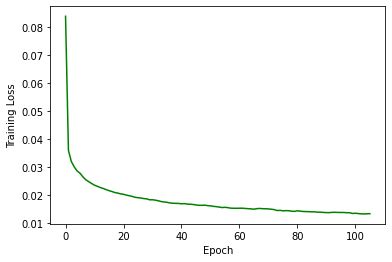

In [14]:
import matplotlib.pyplot as plt
import pandas as pd




# Load data
results = pd.read_csv('debug/test_logs/001/version_1/custom_metrics.csv')

# Plot
plt.plot(results['epoch'], results['train_loss'],color='green')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

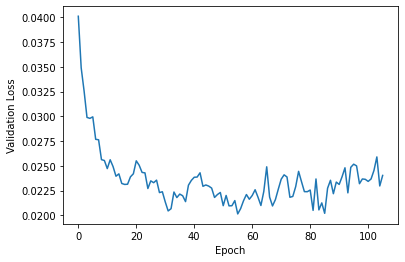

In [15]:
plt.plot(results['epoch'], results['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

In [16]:
#model architecture
print(model)

Model(
  (_criterion): MSELoss()
  (_net): Net(
    (_net): Sequential(
      (0): Linear(in_features=155, out_features=39, bias=True)
      (1): _NetBlock(
        (_block): Sequential(
          (0): Linear(in_features=39, out_features=51, bias=True)
          (1): BatchNorm1d(51, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU()
        )
      )
      (2): _NetBlock(
        (_block): Sequential(
          (0): Linear(in_features=51, out_features=57, bias=True)
          (1): BatchNorm1d(57, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU()
        )
      )
      (3): _NetBlock(
        (_block): Sequential(
          (0): Linear(in_features=57, out_features=37, bias=True)
          (1): BatchNorm1d(37, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU()
        )
      )
      (4): _NetBlock(
        (_block): Sequential(
          (0): Linear(in_features=37, out_features=61,

## Predictions

In [17]:
model.eval()
predictions = model(torch.FloatTensor(x_val))
preds = predictions.detach().numpy()

In [18]:
# print(predictions)
#print("Predicted: ", predictions[0],"\nTrue: ", y_val[0])

In [19]:
#printing minimum loss value
print("min_loss = ", min(results['val_loss']))

min_loss =  0.0201457515358924


## PCA Plot and Error Plots

In [20]:
from matplotlib import cm

grid = data['grid']
acsf_array = data['x']
spectra = data['y']

In [21]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pca_acsf = PCA(2)
w_acsf = pca_acsf.fit_transform(acsf_array)

pca_spectra = PCA(2)
w_spectra = pca_spectra.fit_transform(spectra)

# print(w_spectra.shape)
# print(w_acsf.shape)

N = 10
M = 100

dig = np.digitize(w_acsf[::N, 0], bins=np.linspace(w_acsf[::N, 0].min(), w_acsf[::N, 0].max(), M))
cmap = cm.get_cmap("rainbow", M)

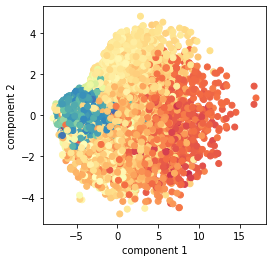

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(w_acsf[:, 0], w_acsf[:, 1],  c=w_spectra[:, 0], cmap=plt.cm.get_cmap('Spectral'))

ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
plt.show()

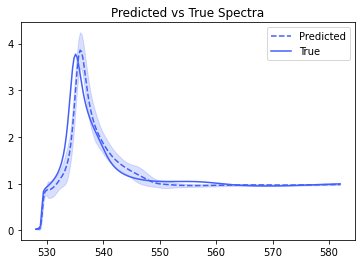

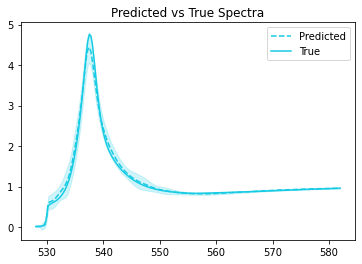

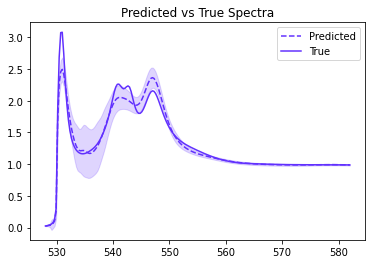

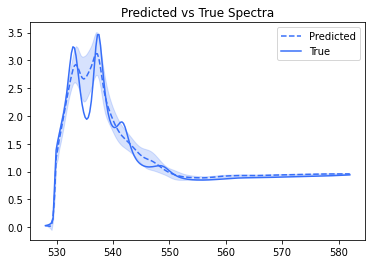

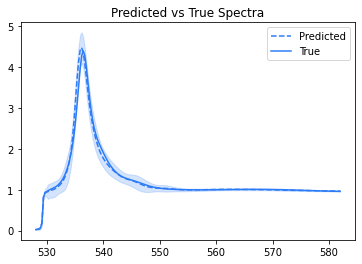

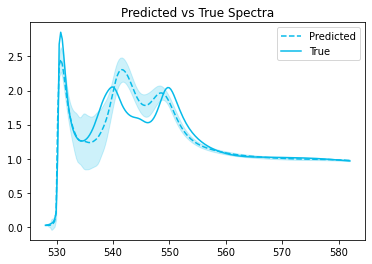

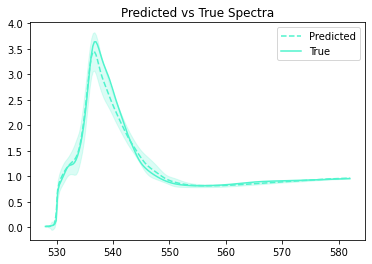

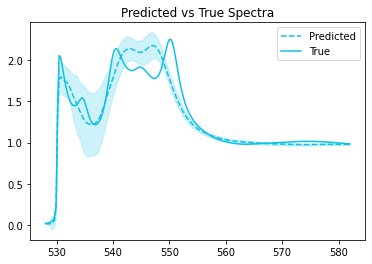

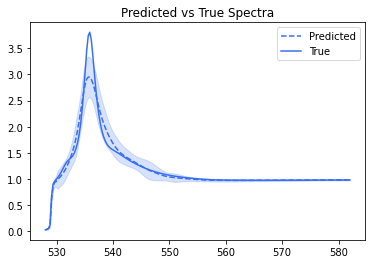

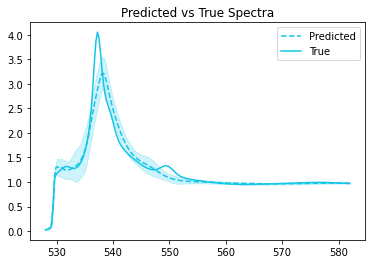

In [23]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(preds, y_val, multioutput = 'raw_values')

rmse = [math.sqrt(mse[i]) for i in range(len(mse))]
for i in range(10):
    fig1, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    
    
    ax1.plot(grid, preds[i], color=cmap(dig[i]), linestyle = 'dashed', label = "Predicted")

    ax1.plot(grid, y_val[i], color=cmap(dig[i]), label = "True")
    ax1.legend(loc="upper right")
    ax1.set_title("Predicted vs True Spectra")
    plt.fill_between(grid, preds[i] -1 * rmse,preds[i] +1 * rmse, color=cmap(dig[i]), alpha = 0.2)
    
    # errorbar(grid, y_val[i], yerr= mse, color = cmap(dig[i]), alpha = 0.5)
    plt.show()